首先，我发现了一下非常**出类拔萃**的人:```['angusshire','romanofficial','nikitavoloboev']```

他们的数据都非常夸张，比方说angushire

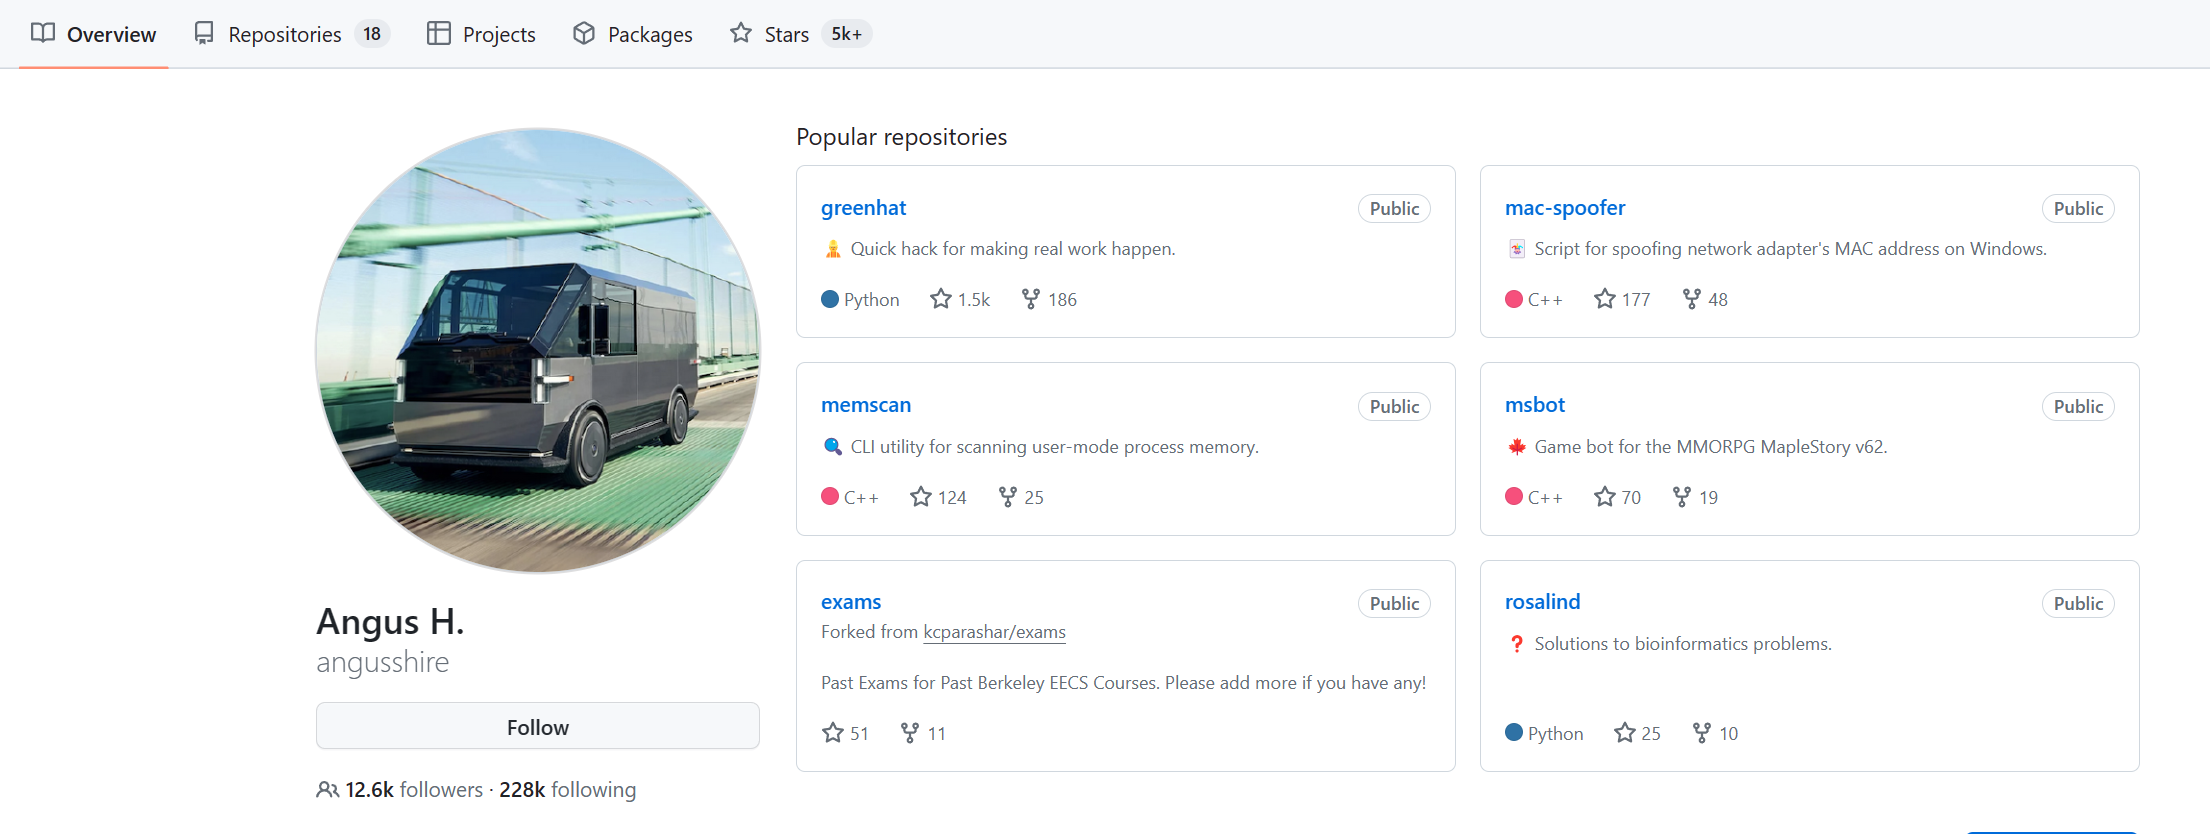

可以看到他们的following人数和star的仓库数都非常离谱，这里进行一些比较阴暗的推测，可能他们使用像pygithub这种脚本自动点赞following和star的，毕竟，如果人手一个个点都要点好久吧

接下来我们先探索一下有多少对用户是相互关注的，以及相互有关系的。

首先我们把前一部分处理完成的数据读取出来。

In [1]:
import pickle
import networkx as nx
graph=nx.DiGraph(pickle.load(open('./graph.pkl','rb')))
t=pickle.load(open('./data.pkl','rb'))
user,user_ind,following_list,star_list,repo_list=tuple(t)

再进行计数

In [2]:
cnt_following=0
cnt_relation=0
undirected_graph=graph.to_undirected()
for i in range(len(user)):
    for j in range(i+1,len(user)):
        if user[i] in following_list[j] and user[j] in following_list[i]:
            cnt_following+=1
        if undirected_graph.has_edge(user[j],user[i]):
            cnt_relation+=1
print(cnt_following,cnt_relation)

423 6456


可以看到，有着相互之间following的用户有423对

但是相互之间有关系的用户还是比较多的,有6456对，这也是合理的，毕竟兴趣相似的两个用户也不一定会相互关注，有可能反应在关注的仓库数量上面

接下来可以看看三人之间相互关注，和存在关系的分别有多少

In [5]:
cnt_following=0
cnt_relation=0
undirected_graph=graph.to_undirected()
for i in range(len(user)):
    for j in range(i+1,len(user)):
        for k in range(j+1,len(user)):
            if  user[i] in following_list[j] and user[j] in following_list[i] and \
                user[i] in following_list[k] and user[k] in following_list[i] and \
                user[k] in following_list[j] and user[j] in following_list[k]:
                cnt_following+=1
            if  undirected_graph.has_edge(user[i],user[j]) and \
                undirected_graph.has_edge(user[i],user[k]) and \
                undirected_graph.has_edge(user[k],user[j]) :
                cnt_relation+=1
                # print(user[i],user[j],user[k])
                # break
print(cnt_following,cnt_relation)

186 32645


可以看到，三个人相互following的数量变少了，但是相互有关系的人变多了。这还是挺有趣的。

在这里提出一个可能的解释：在完全图中，如果三角形的数量大于边的数量，那么需要点的熟练大于5.所以这个情况可能暗示在关系构成的图中，局部有着比较稠密的关系

也就是说在一群人之间有着比较强烈的关系，这也比较符合现实情况。

接下来在探索一下用户之间关系最大的是哪一组

In [10]:
max_pair=('','')
maxx=0
for u,v in graph.edges():
    if graph[u][v]['weight']>maxx:
        max_pair=(u,v)
        maxx=graph[u][v]['weight']
print(max_pair,graph[max_pair[0]][max_pair[1]])

('Shougo', 'mattn') {'weight': 833}


查看这两人的主页自我介绍：

* Shougo ：The text editor is the world.

* mattn ：Long-time Golang user&contributor, Google Dev Expert for Go, and author of many Go tools, Vim plugin author. Windows hacker C#/Java/C/C++,

浏览两者的仓库和star，可以看到两个人都是非常喜欢vim，对于vim都有着很大的贡献。